## Recreating My Own Detailed Spotify Wrapped 2020

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from IPython.display import Image

In [3]:
df_one = pd.read_csv('StreamingHistory0.csv')

In [4]:
df_one.head()

,endTime,artistName,trackName,msPlayed
0,2019-12-15 23:51,The Internet,Girl (feat. KAYTRANADA),466486
1,2019-12-16 00:42,Tame Impala,List Of People (To Try And Forget About),279986
2,2019-12-16 00:46,Tame Impala,Powerlines,258706
3,2019-12-16 00:51,Tame Impala,Taxi’s Here,287306
4,2019-12-16 00:56,Tame Impala,Yes I'm Changing,270680


In [5]:
df_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     10000 non-null  object
 1   artistName  10000 non-null  object
 2   trackName   10000 non-null  object
 3   msPlayed    10000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [6]:
df_two = pd.read_csv('StreamingHistory1.csv')

In [7]:
df_two.head()

,endTime,artistName,trackName,msPlayed
0,2020-09-12 21:46,Bicep,Glue,269149
1,2020-09-12 21:56,Bicep,Glue,543463
2,2020-09-12 22:41,Sebastian Böhm,Blue Monday,211434
3,2020-09-12 22:47,Above & Beyond,Blue Monday (Big Bang) [WYM303],338704
4,2020-09-13 01:11,Bicep,Glue,269149


In [8]:
df_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3766 entries, 0 to 3765
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     3766 non-null   object
 1   artistName  3766 non-null   object
 2   trackName   3766 non-null   object
 3   msPlayed    3766 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 117.8+ KB


In [9]:
streaming_histories = [df_one, df_two]

In [10]:
df = pd.concat(streaming_histories, ignore_index=True)
df = df.rename(columns={'endTime': 'date','artistName':'artist','trackName': 'track',})

In [11]:
df.head()

,date,artist,track,msPlayed
0,2019-12-15 23:51,The Internet,Girl (feat. KAYTRANADA),466486
1,2019-12-16 00:42,Tame Impala,List Of People (To Try And Forget About),279986
2,2019-12-16 00:46,Tame Impala,Powerlines,258706
3,2019-12-16 00:51,Tame Impala,Taxi’s Here,287306
4,2019-12-16 00:56,Tame Impala,Yes I'm Changing,270680


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13766 entries, 0 to 13765
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      13766 non-null  object
 1   artist    13766 non-null  object
 2   track     13766 non-null  object
 3   msPlayed  13766 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 430.3+ KB


In [13]:
# OFFICIAL SPOTIFY WRAPPED TOP ARTISTS
# 1) WASHED OUT
# 2) GRIMES
# 3) TENNIS
# 4) TAME IMPALA
# 5) BLOOD ORANGE

In [14]:
# generates a dataframe that displays the total number of msPlayed for each artist, sorted by from most to least
df.groupby('artist').sum().reset_index().sort_values(by='msPlayed',ascending=False).head(10)

,artist,msPlayed
608,Washed Out,222995129
225,Grimes,155486854
535,Tame Impala,112279151
543,Tennis,98384280
77,Blood Orange,98369458
66,Beach House,90971935
128,DIIV,84106315
499,Slowdive,72405235
69,Bicep,67650445
119,Cocteau Twins,60477706


Here I created a dataframe that lists total number of milliseconds played from each artist, sorted by the top 10. Note that the top 2 artists, as well as the fifth one (Washed, Grimes and Blood Orange, respectively) are consistent with the ones from my official Spotify Wrapped, while position 3 and 4 appear to be swapped.

In [15]:
# allows you to display all of the rows in a dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [57]:
# generate a dataframe listing the number of listens played from each artist, in descending order (top 50)
num_of_listens_by_artists = df.groupby(['artist']).size().to_frame('count').reset_index().sort_values(by='count',ascending=False).head(50)

In [17]:
num_of_listens_by_artists

,artist,count
608,Washed Out,1360
225,Grimes,883
543,Tennis,688
535,Tame Impala,545
128,DIIV,526
77,Blood Orange,525
66,Beach House,440
499,Slowdive,376
119,Cocteau Twins,362
450,Purity Ring,345


In 2020, I listened to Washed Out more than any other artist, listening to them 1360 times. Grimes, the next most listened artist didn't even come close! In addition, this dataframe is more consistent with my official Wrapped that in the previous dataframe. The top 4 artists match up perfectly, but it listed DIIV as the fifth most listened to artist, instead of Blood Orange. And according to this dataframe, they only differ by one count!

In [60]:
#generate a dataframe that lists out the number of listens for each song, in descending order
top_songs = df.groupby(['artist','track']).size().to_frame('count').reset_index().sort_values(by='count',ascending=False).head(240)

In [59]:
top_songs

,artist,track,count
2336,Washed Out,Too Late,180
2294,Washed Out,Before,173
1730,Sky Ferreira,Everything Is Embarrassing,103
1864,Tame Impala,Breathe Deeper,92
793,Grimes,Genesis,89
809,Grimes,Realiti,86
2303,Washed Out,Echoes,83
818,Grimes,Violence - Original Mix,83
2328,Washed Out,Olivia,82
822,Grimes,World Princess part II,79


"Genesis" by Grimes was toward the top most listened songs in 2020. However, on my official Spotify Wrapped, it sat at number 13 on my "Your Top Songs of 2020" playlist, while it's number 5 on my version of "Your Top Songs of 2020".
  
  So I sought to find out why this was happening. I eventually came to the hypothesis that maybe it's because the official Spotify playlist organized it by total duration of each song played and my "playlist" organized it by the number of times played, no matter the duration. "Genesis" is known to have a long outro so I assume that I tend to skip it altogether to listen to another song. As a result, the total duration listened of "Genesis" would be reduced, pushing it further down the ranks of the official playlist. Let's test my hypothesis!

In [19]:
df[(df['track']=='Genesis') & (df['artist'] == 'Grimes')]

,date,artist,track,msPlayed
89,2019-12-18 01:05,Grimes,Genesis,255320
96,2019-12-18 03:44,Grimes,Genesis,255320
178,2019-12-19 08:07,Grimes,Genesis,255320
201,2019-12-19 20:42,Grimes,Genesis,14721
202,2019-12-20 00:15,Grimes,Genesis,14744
218,2019-12-20 08:47,Grimes,Genesis,255320
219,2019-12-20 08:51,Grimes,Genesis,255577
229,2019-12-20 09:17,Grimes,Genesis,1091
267,2019-12-21 08:38,Grimes,Genesis,255320
288,2019-12-23 04:28,Grimes,Genesis,255320


In [20]:
# determine average duration of "Genesis" played
df[(df['track']=='Genesis') & (df['artist'] == 'Grimes')]['msPlayed'].mean()

214268.42696629214

In [21]:
# divide by 60000 to get number of minutes
214268.42696629214/60000

3.5711404494382024

In [22]:
# multiply by 60 to get the number of seconds
.5711*60

34.266000000000005

Average duration listened for "Genesis" by Grimes is 3:34, when the actual length of the song is 4:15. Guess I'm not a big fan of the final 41 seconds!  

**"Is my ‘Your Top Songs Of 2020’ playlist in order of what I listened to most?"**  
"Yes, for the most part your playlist is ordered by the songs you played most frequently to least frequently. We also enhance the listening experience by ensuring tracks by the same artist or on the same album don’t always appear back to back".  
**(Mario, a Spotify FAQ moderator)**

In [71]:
import datetime as dt

In [72]:
# generate a new column that lists which month I listened to each listen
df['month'] = pd.DatetimeIndex(df['date']).strftime('%B')

In [82]:
# generate a new column that lists which day I listened to each listen
df['day'] = pd.DatetimeIndex(df['date']).strftime('%Y-%m-%d')

In [84]:
duration_by_day = df.groupby('day').sum().sort_values(by='msPlayed',ascending=False)

In [85]:
duration_by_day

,msPlayed
day,
2020-03-14,16027915
2020-09-07,15953720
2020-11-18,15846497
2020-09-26,15801125
2020-11-06,15480852
2020-09-10,15390864
2020-05-19,15028456
2019-12-19,14965428
2020-04-05,14811599


I listened to the most music on March 14, 2020, which around the same time we went under quarantine for the very first time for COVID-19. Coincidence? Just maybe.

In [86]:
#generate a dataframe that lists the number of listens per day, sorted by count
listens_by_day = df.groupby('day').size().to_frame('count').reset_index().sort_values(by='count',ascending=False)

In [87]:
listens_by_day

,day,count
290,2020-10-05,112
127,2020-04-21,103
57,2020-02-11,96
155,2020-05-19,90
266,2020-09-10,89
111,2020-04-05,88
23,2020-01-07,88
321,2020-11-06,87
234,2020-08-09,81
66,2020-02-20,80


Even though the duration of music listened to was the longest on March 14, 2020, I listened to the most songs on October 5, 2020. Not sure what I was doing that day to be honest.

<AxesSubplot:xlabel='month', ylabel='count'>

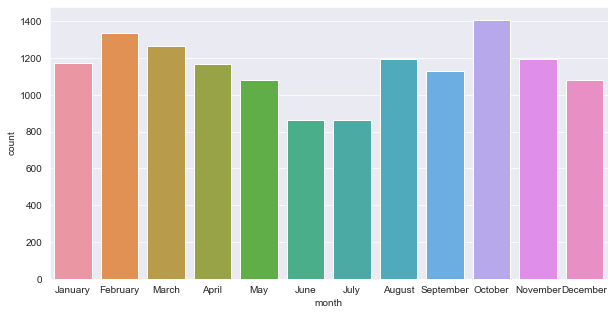

In [88]:
# generate a countplot for the number of listened by month, had to create a list for the order
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(10,5))
sns.countplot(df['month'],order=months)

As expected, the number of listens for 2020 had similar distributions across the months. However, there was a consider decrease in June and July. I wasn't using Spotify as much in June and July because I was using SoundCloud and YouTube more. Typically, I like to listen to Spotify when working out during the day but I do remember listening to SoundCloud mixes more in the summer.

<AxesSubplot:xlabel='month', ylabel='count'>

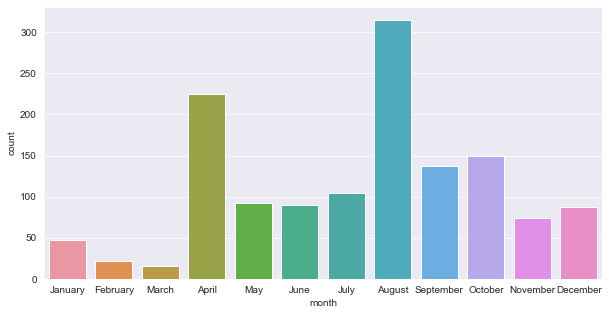

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(df[df['artist']=='Washed Out']['month'],order=months)

I decided to create a visualization for the listening history of my favorite artists. I listened to Washed Out the most during August, which makes sense because August was when they released their new record, "Purple Noon" and a few songs from that record are my favorite Washed Out songs to this day.

<AxesSubplot:xlabel='month', ylabel='count'>

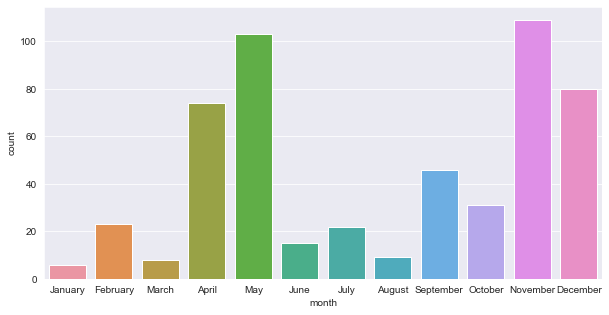

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(df[df['artist']=='DIIV']['month'],order=months)

<AxesSubplot:xlabel='month', ylabel='count'>

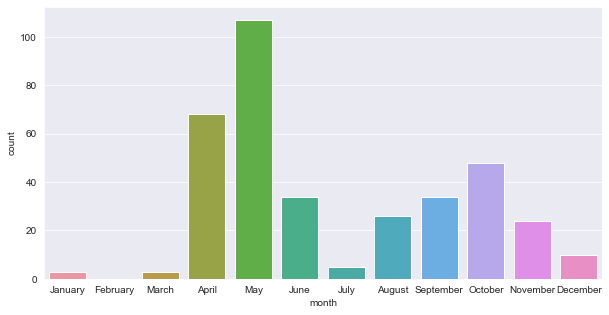

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(df[df['artist']=='Cocteau Twins']['month'],order=months)